In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import seaborn as sns

In [11]:
data = pd.read_csv('diabetes.csv')
del data['Pregnancies']
data.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1


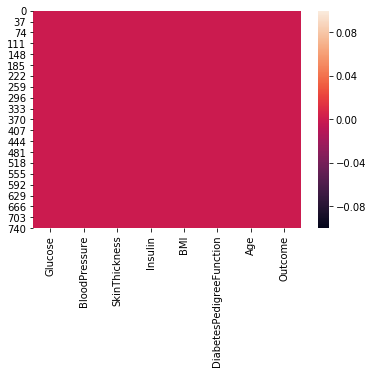

In [12]:
# checking for missing values

sns.heatmap(data.isnull())

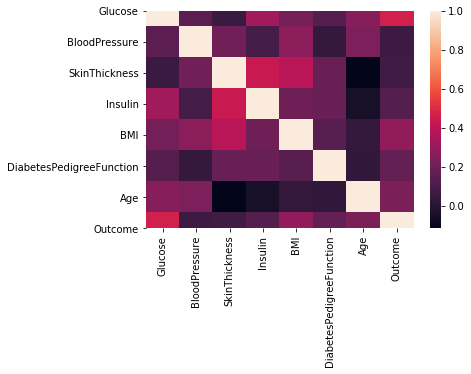

In [13]:
# co-relation matrix

corelation = data.corr()
# print(corelation)
sns.heatmap(corelation)

In [14]:
data.head()
data.shape
data.describe()

data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [15]:
data.groupby('Outcome').mean()

X = data.drop(columns = 'Outcome', axis=1)
Y = data['Outcome']

print(X)

print(Y)


     Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0        148             72             35        0  33.6   
1         85             66             29        0  26.6   
2        183             64              0        0  23.3   
3         89             66             23       94  28.1   
4        137             40             35      168  43.1   
..       ...            ...            ...      ...   ...   
763      101             76             48      180  32.9   
764      122             70             27        0  36.8   
765      121             72             23      112  26.2   
766      126             60              0        0  30.1   
767       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
4                       2.288   33  
..                        ...  ...  
763     

In [16]:
scaler = StandardScaler()

scaler.fit(X)

standardized_data = scaler.transform(X)

print(standardized_data)

X = standardized_data
Y = data['Outcome']

print(X)
print(Y)

[[ 0.84832379  0.14964075  0.90726993 ...  0.20401277  0.46849198
   1.4259954 ]
 [-1.12339636 -0.16054575  0.53090156 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.94372388 -0.26394125 -1.28821221 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.00330087  0.14964075  0.15453319 ... -0.73518964 -0.68519336
  -0.27575966]
 [ 0.1597866  -0.47073225 -1.28821221 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.8730192   0.04624525  0.65635768 ... -0.20212881 -0.47378505
  -0.87137393]]
[[ 0.84832379  0.14964075  0.90726993 ...  0.20401277  0.46849198
   1.4259954 ]
 [-1.12339636 -0.16054575  0.53090156 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.94372388 -0.26394125 -1.28821221 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.00330087  0.14964075  0.15453319 ... -0.73518964 -0.68519336
  -0.27575966]
 [ 0.1597866  -0.47073225 -1.28821221 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.8730192   0.04624525  0.65635768 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)

print(X.shape, X_train.shape, X_test.shape)


(768, 7) (614, 7) (154, 7)


In [41]:
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [42]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7833876221498371


In [38]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score of the test data : ', test_data_accuracy)


Accuracy score of the test data :  0.7597402597402597


In [39]:
input_data = (5,1,72,19,25.8,0.587,51)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')


[[-3.62716799 -3.52089949  3.22820819 -0.52791555 -0.78595734  0.34768723
   1.51108316]]
[0]
The person is not diabetic
